In [1]:
from fastai.vision.all import *

In [10]:
path = Path('G:\\00_FastAI\\Data\\cats-v-dogs')

In [11]:
get_image_files(path)

(#24998) [Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/1.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/100.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/1000.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10000.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10001.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10002.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10003.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10004.jpg'),Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10005.jpg')...]

In [26]:
dls = ImageDataLoaders.from_folder (path, train='training', valid='validation',
                               valid_pct=None, seed=None, vocab=None,
                               item_tfms=Resize(224), batch_tfms=aug_transforms(),
                               shuffle=True, device=None)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [27]:
dls.items[:2]

[Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/1.jpg'),
 Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10.jpg')]

In [28]:
len(dls.items)

22498

In [29]:
dls.valid_ds.items[:3]

[Path('G:/00_FastAI/Data/cats-v-dogs/validation/cats/0.jpg'),
 Path('G:/00_FastAI/Data/cats-v-dogs/validation/cats/10010.jpg'),
 Path('G:/00_FastAI/Data/cats-v-dogs/validation/cats/10021.jpg')]

In [30]:
dls.train_ds.items[:3]

[Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/1.jpg'),
 Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/10.jpg'),
 Path('G:/00_FastAI/Data/cats-v-dogs/training/cats/100.jpg')]

In [31]:
len(dls.valid_ds)

2500

In [32]:
len(dls.train_ds)

22498

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [34]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.097710,0.054695,0.020800,1:12:58


c:\users\nagendra.nagendra\appdata\local\programs\python\python39\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.045373,0.028101,0.010800,1:21:46


In [35]:
from fastbook import *

In [55]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [56]:
img = PILImage.create(uploader.data[0])
prediction, _, probs = learn.predict(img)
print(f'Uploaded animal belongs to {prediction} family')
print(f'Probabilities: Cat - {probs[0].item():.6f}, Dog - {probs[1].item():.6f}')

Uploaded animal belongs to dogs family
Probabilities: Cat - 0.001004, Dog - 0.998996


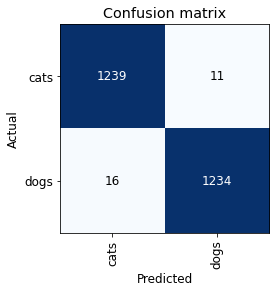

In [57]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

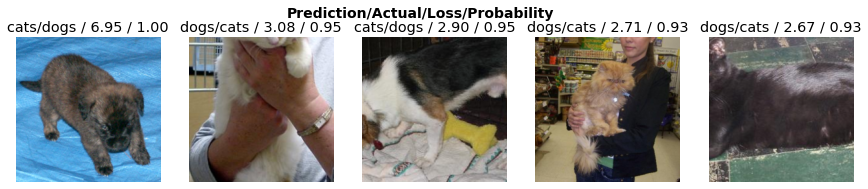

In [58]:
interp.plot_top_losses(5, nrows=1)

In [63]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [64]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [65]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [77]:
import os
learn.export(os.path.abspath('G:\\00_FastAI\\Excercises\\export.pkl'))

In [78]:
path = Path('G:\\00_FastAI\\Excercises')
path.ls(file_exts='.pkl')

(#1) [Path('G:/00_FastAI/Excercises/export.pkl')]

In [79]:
learn_inf = load_learner('G:\\00_FastAI\\Excercises\\export.pkl')

In [82]:
prediction, _, probs = learn_inf.predict('C:\\Users\\Nagendra.NAGENDRA\\Downloads\\pexels-charles-1851164.jpg')
print(f'Uploaded animal belongs to {prediction} family')
print(f'Probabilities: Cat - {probs[0].item():.6f}, Dog - {probs[1].item():.6f}')

Uploaded animal belongs to dogs family
Probabilities: Cat - 0.001004, Dog - 0.998996
